In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
df = pd.read_csv('data.csv', index_col=0)

In [2]:
def makeClass(x):
    if x==1: return "firstClass"
    elif x==2: return "secondClass"
    else: return "thirdClass"
df['pclass'] = df.pclass.apply(lambda x: makeClass(x))
df.fare = df.fare.apply(lambda x: 33 if pd.isnull(x) else x) #33 is the mean value
# df.fare.dropna(inplace=True, how='any')
# df.embarked.dropna(inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,firstClass,female,29.0000,0,0,211.3375,S
1,1,firstClass,male,0.9167,1,2,151.5500,S
2,0,firstClass,female,2.0000,1,2,151.5500,S
3,0,firstClass,male,30.0000,1,2,151.5500,S
4,0,firstClass,female,25.0000,1,2,151.5500,S


In [3]:
df.survived.unique()

array([1, 0], dtype=int64)

In [4]:
def proportion_df(discrete_val):
    by_var = df.groupby([discrete_val,'survived'])
    freq_table = by_var.size()
    freq_table = freq_table.unstack()
    freq_table = freq_table.div(freq_table.sum(1), axis=0)
    return freq_table

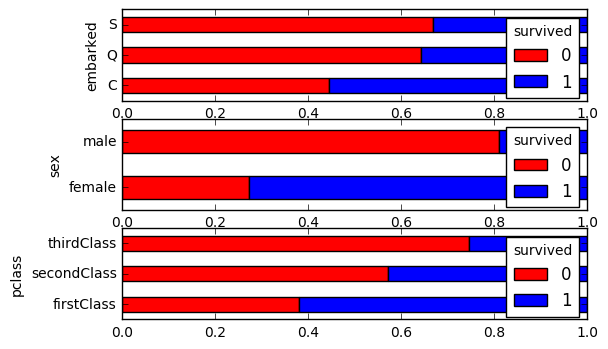

In [5]:
value_list = ['embarked','sex','pclass']
canvas, axes1 = plt.subplots(len(value_list),1)
for val in value_list:
    freq_table = proportion_df(val)
    colorsheme = ['red','blue']
    freq_table.plot(kind='barh', stacked=True, ax=axes1[value_list.index(val)], color=colorsheme)
plt.show()

Looking at these plots we can see that it is much more likely for a female to survive. Furthermore,
we can see that the passanger class has an impact on survival, the lower the class, the lower probability of survival.
The people who embark at Cherbourg have most chances of survival, much better than people from Queenstown and Southampton. 

In [6]:
by_var = df.groupby(["sex",'pclass','embarked','survived'])
freq_table = by_var.size()
freq_table = freq_table.unstack()
freq_table = freq_table.div(freq_table.sum(1), axis=0)

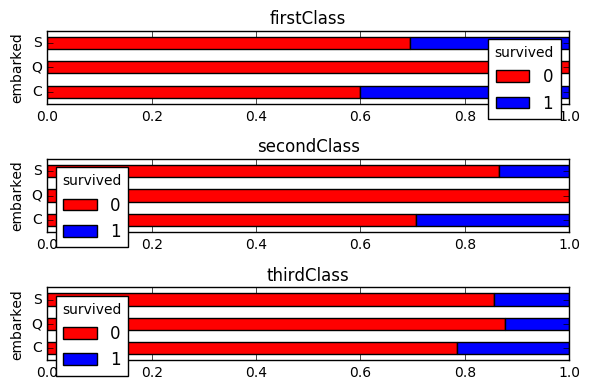

In [24]:
classes = ['firstClass','secondClass','thirdClass']
def plot_by_sex_and_class(df,sex,class_list):
    sex = freq_table.loc[sex]
    canvas, axes1 = plt.subplots(len(class_list),1)
    for c in class_list:
        tbl = sex.loc[c]
        colorsheme = ['red','blue']
        tbl.plot(kind='barh', stacked=True, ax=axes1[class_list.index(c)], color=colorsheme, title=str(c))
    canvas.tight_layout()   
    plt.show()

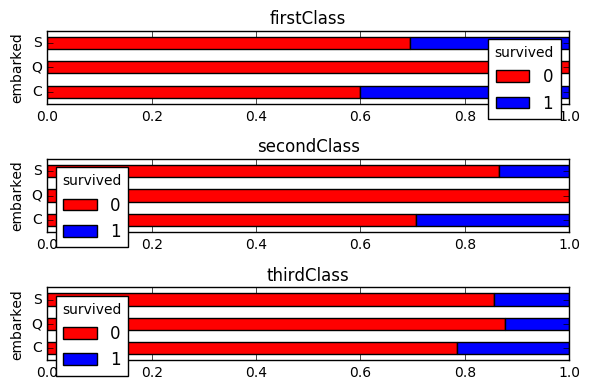

In [25]:
plot_by_sex_and_class(freq_table, 'male', classes)

Here, we can see that males who embarked in Queenstown have the best chances of survival.

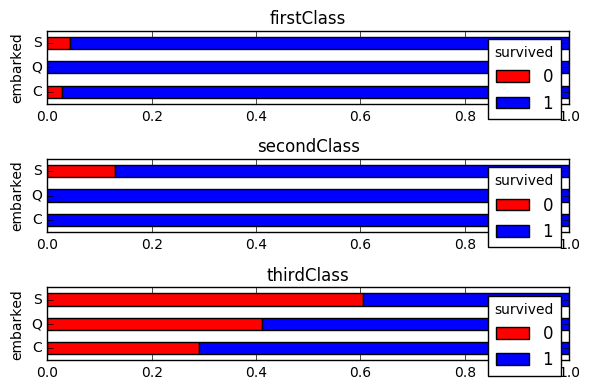

In [18]:
plot_by_sex_and_class(freq_table, 'female', classes)

Here we can see that women that travel in third class have significantly less chances of survival. Also, women who embarked in Southampton and are traveling in any class have the lowest survival rate. 